<a href="https://colab.research.google.com/github/bbeecue/csc172-belvis-unsupervised-act01/blob/main/Unsupervised_Learning_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unsupervised learning is a type of machine learning where algorithms analyze unlabeled data to find patterns, structures, or anomalies without predefined outcomes or guidance. The goal is to let the algorithm independently discover relationships and groups in the data.

# Main Tasks of Unsupervised Learning





## **Clustering**


Algorithms automatically group similar data points, revealing natural clusters within the data.

Examples:
* grouping customers by purchasing behavior
* grouping students based on performance patterns
* clustering images by visual similarity


        Algorithm: K-Means
        - Tries to split data into k groups ("clusters") so each point belongs to the group with the nearest mean
        
        1. Choose number of clusters k
        2. Initialize k cluster centers or "centroids" randomly.
        3. Assign each data point to the nearest centroid.
        4. Recompute centroids as the mean of their assigned points.
        5. Repeat steps 3-4 until assignments stop changing.

        Limitations
        1. requires predefined k
        2. sensitive to outliers

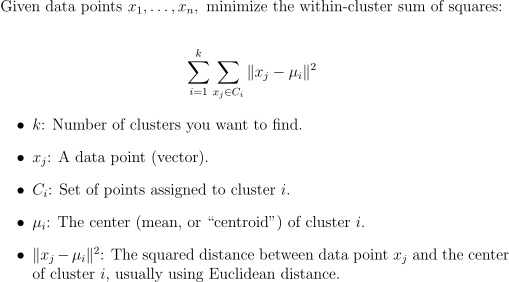

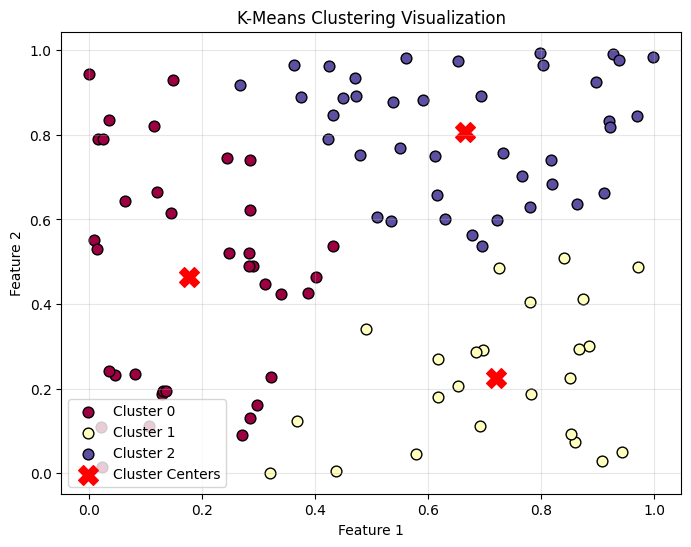

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate 100 random 2D points (each row is a (x, y) pair, values in [0, 1))
X = np.random.rand(100, 2)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
unique_labels = set(labels)

# Color map: each cluster gets a color
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    lbl = f'Cluster {k}'
    mask = (labels == k)
    plt.scatter(X[mask, 0], X[mask, 1], c=[col], s=60, edgecolors='k', label=lbl)

# Show cluster centers as 'X' marks
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200, c='red', marker='X',
    label='Cluster Centers'
)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Visualization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

        Algorithm: Density-Based Spatial Clustering (DBSCAN)
        - Defines clusters based on dense regions of points
        - uses two key parameters:
            - epsilon: maximum distance between two points for them to be considered neighbors
            - minPts: minimum number of points to form a dense region
        
        1. Select an arbitrary, unvisited point
        2. Find all points within epsilon distance (epsilon neighborhood)
        3. Determine if core point or noise
            - if it has atleast minPts neighbors, it is a core point otherwise, start a new cluster
            - if not mark as noise
        4. For each neighbor, it is also a core point, recursively add its neighbors to the cluster
        5. Continue until all points are assigned or maked as noise
        

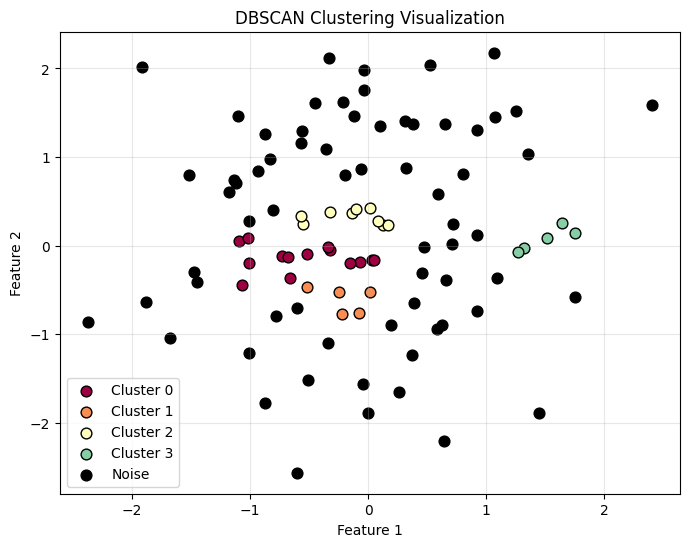

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# uniform distribution
#X = np.random.rand(100, 2)

# normal distribution, mean=0, std=1 per feature
X = np.random.normal(loc=0, scale=1, size=(100, 2))

# Apply DBSCAN with a smaller eps value
db = DBSCAN(eps=0.3, min_samples=5).fit(X)
labels = db.labels_          # Cluster labels (-1 means noise/outlier)
unique_labels = set(labels)  # Find all cluster labels

# Color map: each cluster gets a color; noise is black
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    # Black for noise
    if k == -1:
        col = [0, 0, 0, 1]
        lbl = 'Noise'
    else:
        lbl = f'Cluster {k}'
    mask = (labels == k)
    plt.scatter(X[mask, 0], X[mask, 1], c=[col], s=60, edgecolors='k', label=lbl)


plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering Visualization")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## **Association Rule Mining**


Uncover interesting relationships between features in data or patterns between items in large datasets

Examples:
* market basket analysis ("Customers who buy milk also buy bread")
* recommendation systems
* retail analytics
* website click pattern discovery

        Algorithm: Apriori
        - Find frequent itemsets and association rules from transactional datasets.
        - Apriori uses the Apriori Principle: A frequent itemset must have all of its subsets also frequent.

        1. Generate candidate 1-itemsets (C1)
            Count how often each items appears.
        2. Generate frequent 1-itemsets (L1)
            Keep only items with support ≥ minimum support.
        3. Generate candidate 2-itemsets (C2)
            Combine L1 with itself to create pairs.
        4. Filter to get frequent 2-itemsets (L2)
            Remove pairs with support < min support.
        5. Repeat
            Generate L3, L4…
            Stop when no more frequent itemsets can be created.
        6. Generate Association Rules
            Rules are formed from frequent itemsets and evaluated using confidence and lift.

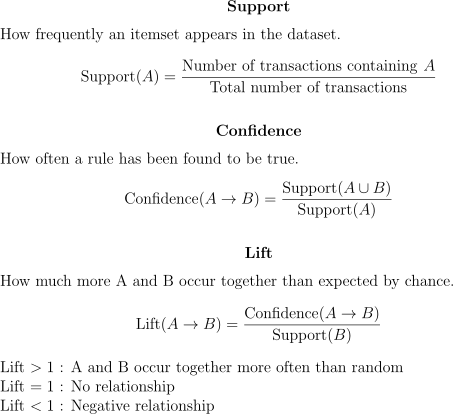





Frequent Itemsets:
    support         itemsets
0      0.6           (Milk)
1      0.6          (Bread)
2      0.8         (Diaper)
3      0.4           (Beer)
4      0.4    (Milk, Bread)
5      0.4   (Milk, Diaper)
6      0.4  (Bread, Diaper)
7      0.4   (Beer, Diaper)

Association Rules:
   antecedents consequents  support  confidence      lift
0      (Milk)     (Bread)      0.4    0.666667  1.111111
1     (Bread)      (Milk)      0.4    0.666667  1.111111
2      (Milk)    (Diaper)      0.4    0.666667  0.833333
3     (Bread)    (Diaper)      0.4    0.666667  0.833333
4      (Beer)    (Diaper)      0.4    1.000000  1.250000


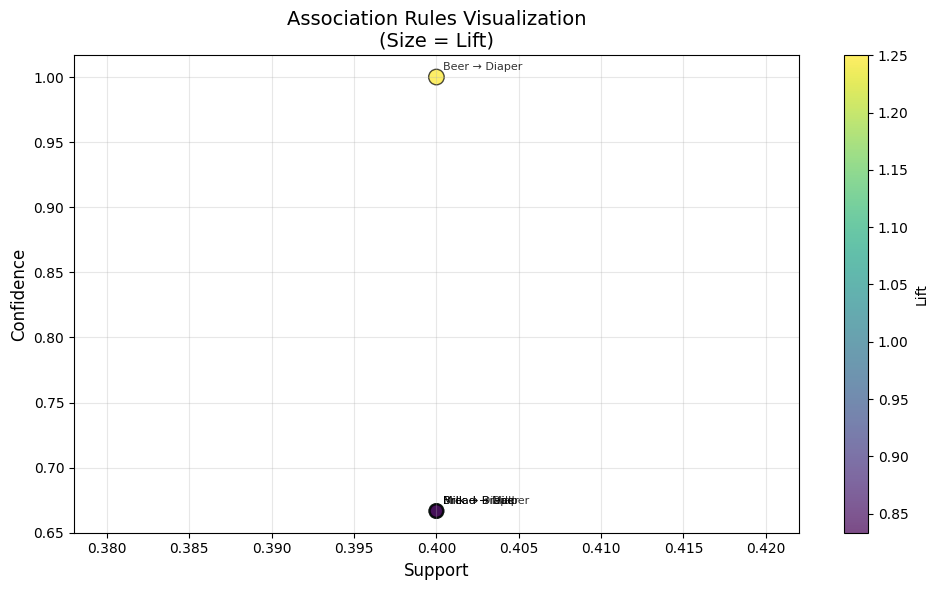

In [48]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transactional dataset (one-hot encoded)
df = pd.DataFrame([
    [1, 1, 0, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0],
    [1, 1, 1, 0],
    [0, 0, 1, 1]
], columns=['Milk', 'Bread', 'Diaper', 'Beer'])

# Step 1: Get Frequent Itemsets
frequent_items = apriori(df, min_support=0.40, use_colnames=True)
print("Frequent Itemsets:\n", frequent_items)

# Step 2: Generate Rules
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.6)
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Step 3: Visualize Association Rules
if len(rules) > 0:
    plt.figure(figsize=(10, 6))

    # Scatter plot: support vs confidence, sized by lift
    scatter = plt.scatter(
        rules['support'],
        rules['confidence'],
        s=rules['lift'] * 100,  # Size represents lift
        c=rules['lift'],        # Color represents lift
        cmap='viridis',
        edgecolors='k',
        alpha=0.7
    )

    # Add labels for each rule
    for idx, row in rules.iterrows():
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))
        plt.annotate(
            f"{antecedents} → {consequents}",
            xy=(row['support'], row['confidence']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=8,
            alpha=0.8
        )

    plt.xlabel('Support', fontsize=12)
    plt.ylabel('Confidence', fontsize=12)
    plt.title('Association Rules Visualization\n(Size = Lift)', fontsize=14)
    plt.colorbar(scatter, label='Lift')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No association rules found with the given thresholds.")

The frequest itemsets table tells you which item combinations appear frequently in the dataset according to the chosen minimum support threshold.

This output is used to:
1. Identify common products
2. Understand co-occurrence patterns
3. Generate association rules (the next step)
4. Visualize item frequencies


The Association rules table shows the rules discovered from the frequent itemsets. If a transaction contains the antecedent, it likely contains the consequent.


| Column          | Meaning                                                 |
| --------------- | ------------------------------------------------------- |
| **antecedents** | The item(s) on the left side of the rule (IF part)      |
| **consequents** | The item(s) on the right side of the rule (THEN part)   |
| **support**     | How often the rule occurs in the dataset                |
| **confidence**  | Probability the consequent appears given the antecedent |
| **lift**        | Strength of association compared to random chance       |
| **leverage**    | Extra support gained beyond independence                |
| **conviction**  | Strength of implication (alternative to lift)           |


Based on our example,

| antecendents | consequents | support | confidence | lift |
| ------------ | ----------- | ------- | ---------- | ---- |
| {Milk}       | {Bread}     | 0.40    | 0.67       | 1.11 |

This means:

* 40% of all transactions contain Milk + Bread
* If a customer buys Milk, there is a 67% chance they also buy Bread
* Lift = 1.11 means they occur together more often than random chance

## Activity 1 - Clustering

**Your Tasks**

    1. Load the dataset using pandas
    2. Show the first 5 rows (head()) and summary statistics (describe())
    3. Select Annual Income and Spending Score as features
    4. Plot a scatter plot of the selected features
    5. Decide on the number of clusters (k) yourself:
        - Test k = 2, 3, 4, or 5
        - Justify your choice based on the scatter plot
    6. Apply K-Means Clustering using your chosen k
    7. Visualize the clusters:
        - Scatter plot colored by cluster
        - Show centroids on the graph
    8. Write a short interpretation:
        - What do the clusters represent?
        - Which group are high spenders?
        - Are there clear segments?


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Load dataset
url = "https://gist.githubusercontent.com/ryanorsinger/cc276eea59e8295204d1f581c8da509f/raw/mall_customers.csv"
df = pd.read_csv(url)

# 2. Display first 5 rows and summary
print(df.head(5))
df.describe()



   customer_id  gender  age  annual_income  spending_score
0            1    Male   19             15              39
1            2    Male   21             15              81
2            3  Female   20             16               6
3            4  Female   23             16              77
4            5  Female   31             17              40


,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


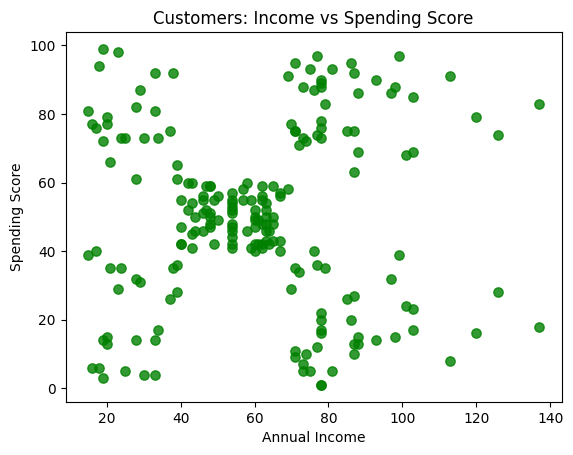

In [50]:
# 3. Select features
X = df[['annual_income', 'spending_score']]

# 4. Scatter plot of features
plt.scatter(
            X['annual_income'],
            X['spending_score'],
            s=45, c='green',
            alpha=0.80
            )
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customers: Income vs Spending Score')
plt.show()

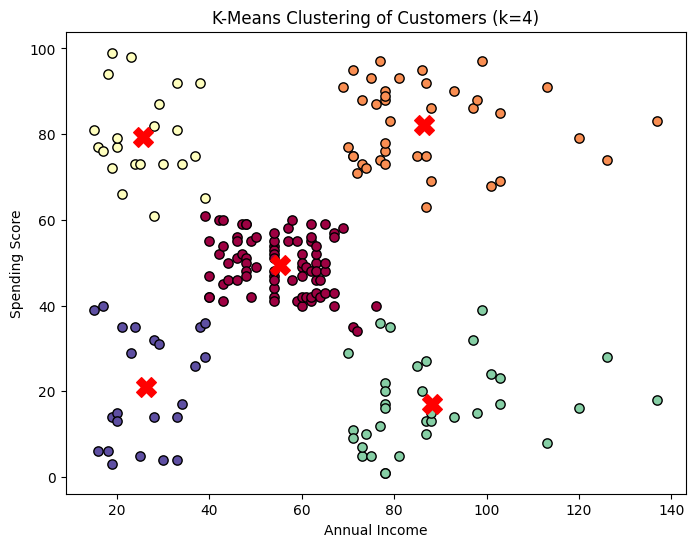

In [51]:
# 5. Choose k (students decide)

k=5

'''The scatter map shows 5 main areas where the points are mostly located, with most points located at
annual incomes 40 to 60, and spending scores 40 to 60. With that being partly at the center of the plot, the rest of the 4 'visible' clusters
are located on each of its corners (all quadrants of the plot)
'''

# 6. Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X)
labels = kmeans.labels_
unique_labels = set(labels)

# 7. Visualize clusters
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8,6))
for k, col in zip(unique_labels, colors):
    lbl = f'Cluster {k}'
    mask = (labels == k)
    plt.scatter(
        X['annual_income'][mask],
        X['spending_score'][mask],
        c=[col],
        s=45,
        edgecolors='k',
        label=lbl)

#Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200, c='red', marker='X',
    label='Cluster Centers'
)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title(f'K-Means Clustering of Customers (k={k})')
plt.show()


**Write a short interpretation:**


1. What do the clusters represent?

The **clusters represent groups of customers according to their spending habits** and **income**.

There are 5 total clusters:

1. **Average Spenders** - largest/densest (with most points) and `center of the clusters`. This cluster is composed of average spenders, meaning these customers' spending match their incomes.

2. **High Income, High Spending** - This cluster can be found in the `2nd quadrant` (top right) of the plot. This cluster is where customers with high income and high spending are located.

3. **High Income, Low Spending** - This cluster can be found in the `4th quadrant` (bottom right) of the plot, where customers with high income, low spending are located.

4. **Low Income, High Spending** - Located in  the `1st quadrant` (top left) is where the cluster of customers with low earnings but high spending is found.

5. **Low Income, Low Spending** - Found in the `3rd quadrant` (bottom left) of the plot is where the cluster of customers with low income and low spending is found. This may suggest these customers spend conservatively.

2. Which group are high spenders?

The group(s) or cluster(s) that represent high spenders are those at the top part of the plot (1st and 2nd quadrants). The clusters are located in the areas with high spending score, however the cluster in the 1st quadrant are those people with low yearly incomes, suggesting these individual's may spend most or all of their income. The 2nd quadrant cluster on the other hand, are those high spenders but with high income. This cluster is composed of individuals that has a high purchasing power, proportional to their income.

3. Are there clear segments?

Although there are points that may overlap to another cluster's area, the scatterplot still shows that there are 5 segments/clusters that represents different customer habits.

## Activity 2 - Assocation Rule Mining

Apply the Apriori algorithm to the following transactions


| TransactionID | Items                          |
| ------------- | ------------------------------ |
| T1            | Notebook, Pen, Water Bottle    |
| T2            | Coffee, Sandwich, Notebook     |
| T3            | Pen, Highlighter, Notebook     |
| T4            | Coffee, Energy Drink, Sandwich |
| T5            | Notebook, Pen, Laptop Sticker  |
| T6            | Coffee, Sandwich, Energy Drink |
| T7            | Pen, Notebook, Coffee          |
| T8            | Laptop Sticker, Notebook, Pen  |
| T9            | Coffee, Pen, Sandwich          |
| T10           | Energy Drink, Notebook, Pen    |



**Your Tasks**

    1. Load the dataset using pandas
    2. Convert to one-hot encoding using TransactionEncoder.
    3. Run Apriori: min_support=0.3
    4. Generate association rules: metric="lift".
    5. Display:
        - Frequent itemsets
        - Rules sorted by confidence
    6. Create at least one visualization:
        - Scatterplot (support vs confidence, lift as size)
    7. Write a short interpretation for the top 3 rules.

In [52]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Student transaction dataset
dataset = []

# One-hot encode
te = TransactionEncoder()


# Apply Apriori

print("Frequent Itemsets:\n", frequent_items)

# Generate association rules

print("\nAssociation Rules:\n", rules[['antecedents','consequents','support','confidence','lift']])


Frequent Itemsets:
    support         itemsets
0      0.6           (Milk)
1      0.6          (Bread)
2      0.8         (Diaper)
3      0.4           (Beer)
4      0.4    (Milk, Bread)
5      0.4   (Milk, Diaper)
6      0.4  (Bread, Diaper)
7      0.4   (Beer, Diaper)

Association Rules:
   antecedents consequents  support  confidence      lift
0      (Milk)     (Bread)      0.4    0.666667  1.111111
1     (Bread)      (Milk)      0.4    0.666667  1.111111
2      (Milk)    (Diaper)      0.4    0.666667  0.833333
3     (Bread)    (Diaper)      0.4    0.666667  0.833333
4      (Beer)    (Diaper)      0.4    1.000000  1.250000


# Limitations of Unsupervised Learning

* No ground truth because data has no labels, there is no objective measure of correctness
    "When clustering customers, how do you know if the groups are truly meaningful?"
* Unsupervised methods can produce outputs based on random initialization, parameter choices, scaling of data
    "K-Means with different random seeds produce different clusters"
* Sensitive to hyperparameters, small parameter changes can produce completely different results
* Patterns found may not map to real-world meaning
* Highly affected by outliers, irrelevant features
    "K-Means is very sensitive to outliers because they can pull centroids"
* Computationally expensive for large datasets making them unsuitable without optimization